In [1]:
import sys
sys.path.append("../")
from mir.common.parser import *
from mir.common.repertoire import Repertoire, RepertoireDataset
from mir.basic.segment_usage import *
import time

In [2]:
from sklearn.manifold import TSNE

In [3]:
metadata = pd.read_csv('assets/samples/fmba_healthy/metadata.csv')
metadata

,sequencingDate,folder,R1,R2,name,COVID_status,projectName,COVID_IgG,COVID_IgM,COVID_PCR,...,HLA-DQB1.2,HLA-DRB1.1,HLA-DRB1.2,id,subsequent_sequencing,HLA-DRB4.1,HLA-DRB3.1,HLA-DRB5.1,gene,run
0,2020 10 19,2020/10_FMBA_NovaSeq6,770101520808_S102_L002_R1_001.fastq.gz,770101520808_S102_L002_R2_001.fastq.gz,770101520808,healthy,FMBA_DNA,no,no,negative,...,DQB1*06:02,DRB1*11:04,DRB1*15:01,770101520,NaN,NaN,NaN,NaN,NaN,770101520808_S102_L002.clonotypes.TRB.txt
1,2020 10 19,2020/10_FMBA_NovaSeq6,500001210807_S66_L001_R1_001.fastq.gz,500001210807_S66_L001_R2_001.fastq.gz,500001210807,healthy,FMBA_DNA,no,no,negative,...,DQB1*04:02,DRB1*07:01,DRB1*08:01,500001210,NaN,NaN,NaN,NaN,NaN,500001210807_S66_L001.clonotypes.TRB.txt
2,2020 10 19,2020/10_FMBA_NovaSeq6,500002190807_S8_L001_R1_001.fastq.gz,500002190807_S8_L001_R2_001.fastq.gz,500002190807,healthy,FMBA_DNA,no,no,negative,...,DQB1*04:02,DRB1*07:01,DRB1*08:01,500002190,NaN,NaN,NaN,NaN,NaN,500002190807_S8_L001.clonotypes.TRB.txt
3,2020 10 19,2020/10_FMBA_NovaSeq4,780003510808_S92_L001_R1_001.fastq.gz,780003510808_S92_L001_R2_001.fastq.gz,780003510808,healthy,FMBA_DNA,no,no,negative,...,DQB1*03:03,DRB1*07:01,DRB1*07:01,780003510,NaN,NaN,NaN,NaN,NaN,780003510808_S92_L001.clonotypes.TRB.txt
4,2020 10 19,2020/10_FMBA_NovaSeq4,550001610808_S148_L002_R1_001.fastq.gz,550001610808_S148_L002_R2_001.fastq.gz,550001610808,healthy,FMBA_DNA,no,no,negative,...,DQB1*05:01,DRB1*01:01,DRB1*11:04,550001610,NaN,NaN,NaN,NaN,NaN,550001610808_S148_L002.clonotypes.TRB.txt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2020 10 19,2020/10_FMBA_NovaSeq5,270000140808_S174_L002_R1_001.fastq.gz,270000140808_S174_L002_R2_001.fastq.gz,270000140808,healthy,FMBA_DNA,no,no,negative,...,DQB1*05:02,DRB1*16:01,DRB1*16:01,270000140,NaN,NaN,NaN,NaN,NaN,270000140808_S174_L002.clonotypes.TRB.txt
96,2020 10 19,2020/10_FMBA_NovaSeq5,500001400808_S155_L002_R1_001.fastq.gz,500001400808_S155_L002_R2_001.fastq.gz,500001400808,healthy,FMBA_DNA,no,no,negative,...,DQB1*06:01,DRB1*07:01,DRB1*15:02,500001400,NaN,NaN,NaN,NaN,NaN,500001400808_S155_L002.clonotypes.TRB.txt
97,2020 10 19,2020/10_FMBA_NovaSeq6,780004000807_S5_L001_R1_001.fastq.gz,780004000807_S5_L001_R2_001.fastq.gz,780004000807,healthy,FMBA_DNA,no,no,negative,...,DQB1*05:01,DRB1*01:01,DRB1*04:01,780004000,NaN,NaN,NaN,NaN,NaN,780004000807_S5_L001.clonotypes.TRB.txt
98,2020 10 19,2020/10_FMBA_NovaSeq4,550001850808_S122_L002_R1_001.fastq.gz,550001850808_S122_L002_R2_001.fastq.gz,550001850808,healthy,FMBA_DNA,no,no,negative,...,DQB1*05:01,DRB1*01:01,DRB1*04:01,550001850,NaN,NaN,NaN,NaN,NaN,550001850808_S122_L002.clonotypes.TRB.txt


In [4]:
t0 = time.time()
dataset = RepertoireDataset.load(parser=VDJtoolsParser(sep=','), 
                                 metadata=metadata,
                                 threads=28,
                                 paths=['assets/samples/fmba_healthy/' + r['run'] + '.gz'
                                        for _, r in metadata.iterrows()])
print(time.time() - t0)


63.15539526939392


In [5]:
dataset.evaluate_segment_usage()

,TRBV11-1*01,TRBV30*01,TRBV4-1*01,TRBV7-6*01,TRBV5-3*01,TRBJ2-1*01,TRBV12-4*01,TRBV25-1*01,TRBJ2-5*01,TRBV15*01,...,TRBV29-1*01,TRBJ1-4*01,TRBV12-1*01,TRBV12-2*01,TRBV24-1*01,TRBV5-6*01,TRBV5-5*01,TRBV3-1*01,TRBV11-2*01,TRBV6-5*01
0,103,338,341,259,63,2716,6,144,1959,114,...,459,1143,25,50,352,410,225,657,431,819
1,31,211,182,94,16,1334,5,73,738,5,...,161,280,7,9,119,127,61,95,123,343
2,44,313,220,166,28,1708,17,124,1100,17,...,235,449,10,25,207,174,106,366,227,524
3,8,59,83,32,17,543,6,21,349,10,...,72,141,2,8,76,51,33,81,69,154
4,97,686,435,242,61,3454,11,222,2042,33,...,431,962,23,71,479,404,245,393,514,838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,92,391,515,347,93,4060,18,210,2600,45,...,512,1121,26,69,439,529,286,606,646,1127
96,17,54,123,60,18,876,2,26,578,10,...,115,196,8,13,104,85,57,66,116,227
97,15,329,199,90,29,1022,7,119,245,21,...,235,511,13,21,254,214,101,200,189,316
98,36,344,343,118,37,2102,15,135,1077,20,...,224,475,13,29,232,158,97,336,280,456


In [6]:
folder_to_run_mapping = {}
for folder in dataset.metadata[['run', 'folder']].folder.unique():
    folder_to_run_mapping[folder] = set(dataset.metadata[dataset.metadata.folder == folder].run)

In [7]:
metadata.head()

,sequencingDate,folder,R1,R2,name,COVID_status,projectName,COVID_IgG,COVID_IgM,COVID_PCR,...,HLA-DQB1.2,HLA-DRB1.1,HLA-DRB1.2,id,subsequent_sequencing,HLA-DRB4.1,HLA-DRB3.1,HLA-DRB5.1,gene,run
0,2020 10 19,2020/10_FMBA_NovaSeq6,770101520808_S102_L002_R1_001.fastq.gz,770101520808_S102_L002_R2_001.fastq.gz,770101520808,healthy,FMBA_DNA,no,no,negative,...,DQB1*06:02,DRB1*11:04,DRB1*15:01,770101520,NaN,NaN,NaN,NaN,NaN,770101520808_S102_L002.clonotypes.TRB.txt
1,2020 10 19,2020/10_FMBA_NovaSeq6,500001210807_S66_L001_R1_001.fastq.gz,500001210807_S66_L001_R2_001.fastq.gz,500001210807,healthy,FMBA_DNA,no,no,negative,...,DQB1*04:02,DRB1*07:01,DRB1*08:01,500001210,NaN,NaN,NaN,NaN,NaN,500001210807_S66_L001.clonotypes.TRB.txt
2,2020 10 19,2020/10_FMBA_NovaSeq6,500002190807_S8_L001_R1_001.fastq.gz,500002190807_S8_L001_R2_001.fastq.gz,500002190807,healthy,FMBA_DNA,no,no,negative,...,DQB1*04:02,DRB1*07:01,DRB1*08:01,500002190,NaN,NaN,NaN,NaN,NaN,500002190807_S8_L001.clonotypes.TRB.txt
3,2020 10 19,2020/10_FMBA_NovaSeq4,780003510808_S92_L001_R1_001.fastq.gz,780003510808_S92_L001_R2_001.fastq.gz,780003510808,healthy,FMBA_DNA,no,no,negative,...,DQB1*03:03,DRB1*07:01,DRB1*07:01,780003510,NaN,NaN,NaN,NaN,NaN,780003510808_S92_L001.clonotypes.TRB.txt
4,2020 10 19,2020/10_FMBA_NovaSeq4,550001610808_S148_L002_R1_001.fastq.gz,550001610808_S148_L002_R2_001.fastq.gz,550001610808,healthy,FMBA_DNA,no,no,negative,...,DQB1*05:01,DRB1*01:01,DRB1*11:04,550001610,NaN,NaN,NaN,NaN,NaN,550001610808_S148_L002.clonotypes.TRB.txt


In [8]:
log_exp_usage_table = StandardizedSegmentUsageTable.load_from_repertoire_dataset(repertoire_dataset=dataset, gene='TRB', segment_type='V', group_mapping=folder_to_run_mapping, standardization_method='log_exp')
z_score_usage_table = StandardizedSegmentUsageTable.load_from_repertoire_dataset(repertoire_dataset=dataset, gene='TRB', segment_type='V', group_mapping=folder_to_run_mapping, standardization_method='z_score')
norm_usage_table = NormalizedSegmentUsageTable.load_from_repertoire_dataset(repertoire_dataset=dataset, gene='TRB', segment_type='V')


In [11]:
dataset.segment_usage_matrix

,TRBV11-1*01,TRBV30*01,TRBV4-1*01,TRBV7-6*01,TRBV5-3*01,TRBJ2-1*01,TRBV12-4*01,TRBV25-1*01,TRBJ2-5*01,TRBV15*01,...,TRBV29-1*01,TRBJ1-4*01,TRBV12-1*01,TRBV12-2*01,TRBV24-1*01,TRBV5-6*01,TRBV5-5*01,TRBV3-1*01,TRBV11-2*01,TRBV6-5*01
0,103,338,341,259,63,2716,6,144,1959,114,...,459,1143,25,50,352,410,225,657,431,819
1,31,211,182,94,16,1334,5,73,738,5,...,161,280,7,9,119,127,61,95,123,343
2,44,313,220,166,28,1708,17,124,1100,17,...,235,449,10,25,207,174,106,366,227,524
3,8,59,83,32,17,543,6,21,349,10,...,72,141,2,8,76,51,33,81,69,154
4,97,686,435,242,61,3454,11,222,2042,33,...,431,962,23,71,479,404,245,393,514,838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,92,391,515,347,93,4060,18,210,2600,45,...,512,1121,26,69,439,529,286,606,646,1127
96,17,54,123,60,18,876,2,26,578,10,...,115,196,8,13,104,85,57,66,116,227
97,15,329,199,90,29,1022,7,119,245,21,...,235,511,13,21,254,214,101,200,189,316
98,36,344,343,118,37,2102,15,135,1077,20,...,224,475,13,29,232,158,97,336,280,456


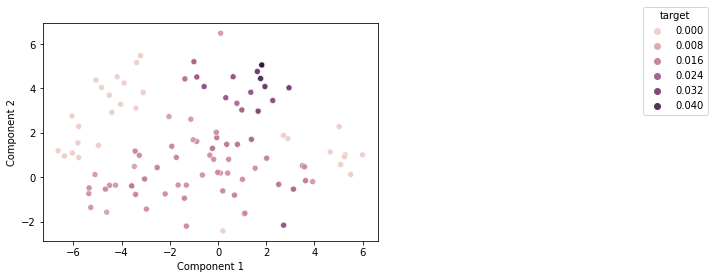

In [12]:
norm_usage_table.plot_pca_results_colored_by(target=norm_usage_table.segment_usage_matrix['TRBV4-3*01'], method=TSNE)

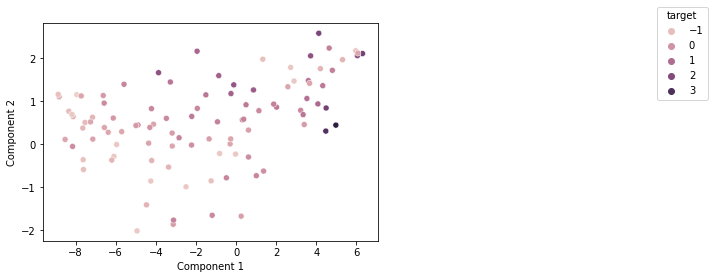

In [13]:
z_score_usage_table.plot_pca_results_colored_by(target=z_score_usage_table.segment_usage_matrix['TRBV4-3*01'], method=TSNE)

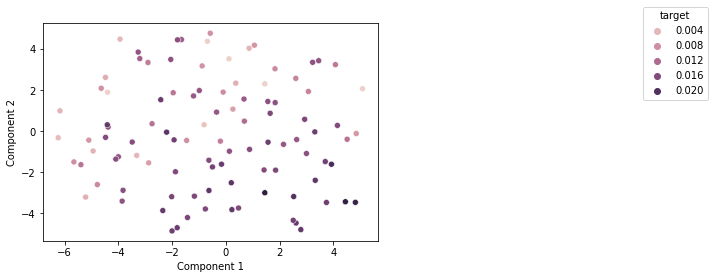

In [14]:
log_exp_usage_table.plot_pca_results_colored_by(target=log_exp_usage_table.segment_usage_matrix['TRBV4-3*01'], method=TSNE)

/home/evlasova/mirpy/notebooks/../mir/basic/segment_usage.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  needed_data[gene] = (self.segment_usage_matrix[gene] - self.segment_usage_matrix[gene].min()) / (


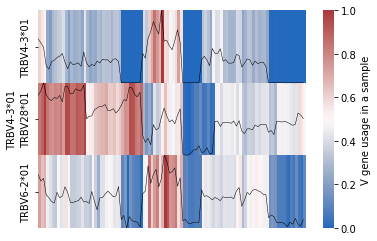

In [15]:
norm_usage_table.plot_clustermap_axes_based(genes=['TRBV4-3*01', 'TRBV28*01', 'TRBV6-2*01'])

/home/evlasova/mirpy/notebooks/../mir/basic/segment_usage.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  needed_data[gene] = (self.segment_usage_matrix[gene] - self.segment_usage_matrix[gene].min()) / (


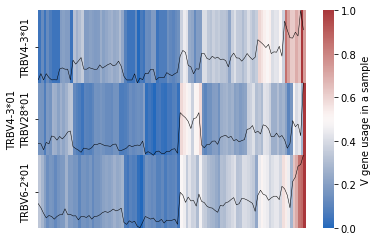

In [16]:
z_score_usage_table.plot_clustermap_axes_based(genes=['TRBV4-3*01', 'TRBV28*01', 'TRBV6-2*01'])

/home/evlasova/mirpy/notebooks/../mir/basic/segment_usage.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  needed_data[gene] = (self.segment_usage_matrix[gene] - self.segment_usage_matrix[gene].min()) / (


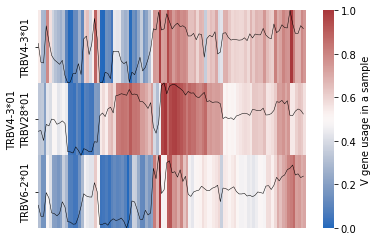

In [17]:
log_exp_usage_table.plot_clustermap_axes_based(genes=['TRBV4-3*01', 'TRBV28*01', 'TRBV6-2*01'])